In [16]:
import pandas as pd
import numpy as np
from utils import load_data, preprocess_data
import matplotlib.pyplot as plt
import numpy as np

In [17]:



def count_images(df):
    # Calculate the number of images per person for each dataset
    images_per_person_l = df.groupby('id')['image_name'].count()

    # Define bins and labels
    bins = [26, 29, 30, 35]  # Ensure bins are strictly increasing
    labels = ['27-29', '30', '31-35']  # Labels for the bins

    # Bin the data and count occurrences
    l_counts = pd.cut(images_per_person_l, bins=bins, labels=labels).value_counts(sort=False)

    # Combine the results into a single table
    comparison_table = pd.DataFrame({
        'Range of Images (per person)': labels,
        'Number of Persons': l_counts.values,
    })
    print(comparison_table)
    return




In [18]:

    
df_s, df_l= load_data()

embedding_columns = ["embedding_"+str(i) for i in range(512)]
id_columns = ['id']
image_name_columns= ['image_name']
labels_columns = ['5_o_Clock_Shadow', 'Arched_Eyebrows',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young']


count_images(df_s)

  Range of Images (per person)  Number of Persons
0                        27-29                 20
1                           30                964
2                        31-35                 16


In [19]:
(20+964+16)
len(df_l)
len(labels_columns)

39

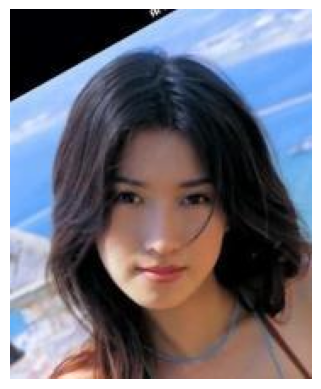

In [34]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the image
image_path = 'celeba/img_celeba/000211.jpg'

# Read and display the image
img = mpimg.imread(image_path)

# Plot the image
plt.imshow(img)
plt.axis('off')  # Hide the axes for better visualization
plt.show()


/usr/lib64/python3.12/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


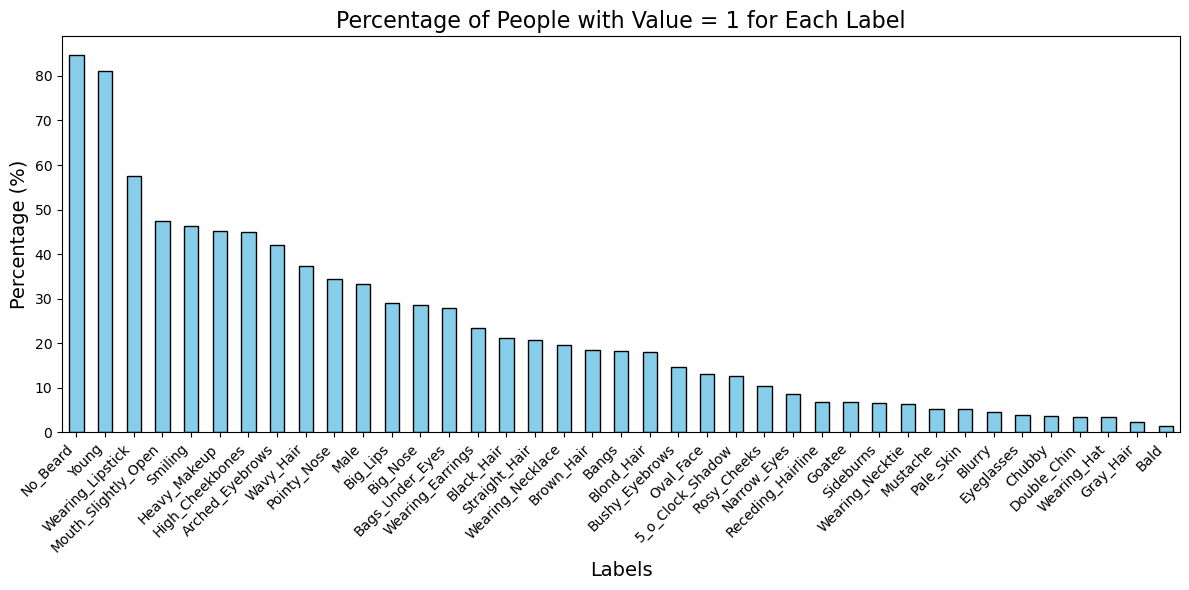

In [20]:

# Calculate the percentage of people with value = 1 for each label
percentages = (np.sum(df_s[labels_columns]==1)/ len(df_s)) * 100

# Plot the percentages
plt.figure(figsize=(12, 6))
percentages.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Percentage of People with Value = 1 for Each Label', fontsize=16)
plt.xlabel('Labels', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


In [21]:
# Retain only ID and label columns
df_s = df_s[['id'] + image_name_columns+labels_columns]
df_l = df_l[['id'] + image_name_columns+labels_columns]

# Merge datasets on 'id'
merged_df = pd.merge(df_s, df_l, on='id', suffixes=('_s', '_l'))

# Check for inconsistencies
inconsistent_ids = []
for label in labels_columns:
    mismatches = np.sum(df_s[f'{label}']  != df_l[f'{label}'])
    if mismatches:
        print(mismatches)
        print(label)
        break
        inconsistent_ids.append((label, mismatches['id'].tolist()))

# Print results
if inconsistent_ids:
    print("Inconsistencies found in the following labels:")
    for label, ids in inconsistent_ids:
        print(f" - {label}: {len(ids)} IDs with mismatches (IDs: {ids[:5]}{'...' if len(ids) > 5 else ''})")
else:
    print("All labels are consistent across the datasets for the same ID.")



All labels are consistent across the datasets for the same ID.


In [22]:


# Check for inconsistencies
inconsistent_ids_and_labels = {}

# Loop over each label to compare values
for label in labels_columns:
    # Compare values for the current label between both datasets
    for id_value in df_s['id'].unique():
        # Check if values are inconsistent for this id and label
        value_s = df_s[df_s['id'] == id_value][f'{label}']
        if len(np.unique(value_s))>1:

            try:
                inconsistent_ids_and_labels[label].append(id_value)
            except:
                inconsistent_ids_and_labels[label] = [id_value]





In [33]:
import pickle

# Save dictionary to a file
with open('inconsistent_ids_and_labels.pkl', 'wb') as file:
    pickle.dump(inconsistent_ids_and_labels, file)

In [32]:
for i in labels_columns:
    print(i)
    print(len(inconsistent_ids_and_labels[i])/1000)


5_o_Clock_Shadow
0.285
Arched_Eyebrows
0.84
Bags_Under_Eyes
0.893
Bald
0.054
Bangs
0.682
Big_Lips
0.427
Big_Nose
0.653
Black_Hair
0.617
Blond_Hair
0.432
Blurry
0.496
Brown_Hair
0.741
Bushy_Eyebrows
0.499
Chubby
0.247
Double_Chin
0.213
Eyeglasses
0.374
Goatee
0.201
Gray_Hair
0.11
Heavy_Makeup
0.657
High_Cheekbones
0.934
Male
0.11
Mouth_Slightly_Open
0.993
Mustache
0.164
Narrow_Eyes
0.694
No_Beard
0.259
Oval_Face
0.63
Pale_Skin
0.574
Pointy_Nose
0.81
Receding_Hairline
0.447
Rosy_Cheeks
0.551
Sideburns
0.205
Smiling
0.974
Straight_Hair
0.832
Wavy_Hair
0.816
Wearing_Earrings
0.674
Wearing_Hat
0.402
Wearing_Lipstick
0.575
Wearing_Necklace
0.779
Wearing_Necktie
0.294
Young
0.395


In [24]:
df_s[df_s['id'] == 10082][['id','image_name','Male']]

,id,image_name,Male
29147,10082,001365.jpg,-1
29148,10082,001646.jpg,1
29149,10082,004061.jpg,-1
29150,10082,017877.jpg,-1
29151,10082,017931.jpg,-1
29152,10082,018633.jpg,-1
29153,10082,025682.jpg,-1
29154,10082,032140.jpg,-1
29155,10082,035503.jpg,-1
29156,10082,043902.jpg,-1


In [25]:
# Print results
if inconsistent_ids_and_labels:
    print("Inconsistencies found:")
    print([k for k in inconsistent_ids_and_labels.keys()])

else:
    print("All labels are consistent across the datasets for the same ID.")



Inconsistencies found:
['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young']


In [26]:
df_l.head()

,id,image_name,5_o_Clock_Shadow,Arched_Eyebrows,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,15,011256.jpg,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,1,-1,-1,-1,1
1,15,013138.jpg,-1,-1,-1,-1,-1,1,-1,1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,1
2,15,018122.jpg,1,1,-1,-1,-1,-1,-1,1,...,1,-1,1,-1,-1,-1,-1,-1,-1,1
3,15,026437.jpg,1,1,1,-1,-1,-1,-1,1,...,1,-1,1,-1,-1,-1,-1,-1,-1,1
4,15,029700.jpg,1,-1,-1,-1,-1,-1,-1,1,...,1,-1,1,-1,-1,-1,-1,-1,1,1


In [27]:

# Compare labels for each column
inconsistent_labels = {}
for label in labels_columns:
    # Check where the values differ for the same `id`
    mismatches = merged[merged[f'{label}_s'] != merged[f'{label}_l']]
    if not mismatches.empty:
        inconsistent_labels[label] = len(mismatches)

# Output results
if inconsistent_labels:
    print("Inconsistencies found in the following labels:")
    for label, count in inconsistent_labels.items():
        print(f"- {label}: {count} mismatches")
else:
    print("All labels are consistent across the datasets for matching IDs.")


NameError: name 'merged' is not defined